<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Выделение-признаков-и-целевого-признака" data-toc-modified-id="Выделение-признаков-и-целевого-признака-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выделение признаков и целевого признака</a></span></li><li><span><a href="#Случайная-обратимая-матрица" data-toc-modified-id="Случайная-обратимая-матрица-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Случайная обратимая матрица</a></span></li><li><span><a href="#Преобразование-признаков" data-toc-modified-id="Преобразование-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Преобразование признаков</a></span></li><li><span><a href="#Разделение-на-обучающий-и-тестовый-наборы-данных" data-toc-modified-id="Разделение-на-обучающий-и-тестовый-наборы-данных-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Разделение на обучающий и тестовый наборы данных</a></span></li><li><span><a href="#Обучение-модели-линейной-регрессии" data-toc-modified-id="Обучение-модели-линейной-регрессии-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Обучение модели линейной регрессии</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Затем обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

Для начала импортируем библиотеки, которые будем использовать в ходе исследования:

In [1]:
# импорт библиотеки pandas
import pandas as pd

# импорт библиотеки numpy
import numpy as np

# импорт библиотеки seaborn
import seaborn as sns

# импорт pyplot из библиотеки matplotlib
import matplotlib.pyplot as plt

# train_test_split из модуля sklearn.model_selection 
# для разделения исходной выборки на обучающую и тестовую
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score


Прочитаем файл c данными: `/datasets/insurance.csv`. 

Cохраним содержимое в соответствующей переменной:

In [2]:
# чтение файла с данными и сохранение в geo_data_0
df_insurance = pd.read_csv('/datasets/insurance.csv')

Выведем **размерность таблицы** и ознакомимся с результатами:

In [3]:
#выведем размерность таблицы df_insurance
df_insurance.shape

(5000, 5)

5000 объектов, 5 признаков в исходном датафрейме.

Применем метод **`info()`** к таблице:

In [4]:
#выведем информацию о таблице df_insurance
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


В исходном датафрейме отсуствуют пропущенные значения. Типы данных корректны, за исключением, возможно, возраста клиентов.

Из описания данных известно следующее.

**Признаки:** 
- пол, 
- возраст,
- зарплата застрахованного, 
- количество членов его семьи. 

**Целевой признак:** 
- количество страховых выплат клиенту за последние 5 лет.

Выведем первые несколько строк таблицы:

In [5]:
#выведем первые несколько строк таблицы
df_insurance.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Ознакомимся с характеристиками выборки:

In [6]:
#характеристика выборки признаков датафрейма df_insurance
df_insurance.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Из характеристик выборок признаков мы видим:
- `Пол` - *бинарный качественный признак*, который принимает значения `1` или `0`. Выборка по полу не смещена, примерно одинаковое количество женщин и мужчин, так как среднее значение около 0,5.
- `Возраст`, `Зарплата`, `Члены семьи` - количественные признаки, средняя и медиана в них близки, что говорит о равномерности выборок.
- `Возраст`, вероятно, дискретная переменная, принимающая определённые значения.
- `Зарплата` клиентов от *5300 до 79000 единиц*, в среднем - 39916 тыс, медиана - 40200 ед.
- По признаку `Члены семьи` мы знаем, что у клиентов от 0 до 6 членов семьи. В среднем 1,2, медиана - 1.
- Возраст клиентов от 18 до 65 лет, в среднем 30,95, медиана 30. 
- Признак `Страховые выплаты` имеет среднее значение `0,148`, максимальное `5,0`, но медиана `0`, возможно, что эта перменная дискретная, принимающая определённые значения, как и возраст клиентов.

С помощью команды **`unique()`** ознакомимся с уникальными значениями столбца `'Страховые выплаты'`:

In [7]:
#выводим уникальные значения столбца 'Страховые выплаты'
df_insurance['Страховые выплаты'].unique()

array([0, 1, 2, 3, 5, 4])

Действительно, `'Страховые выплаты'` - *дискретная количественная переменная*, принимает целые значения от 0 до 5.

Ознакомимся с уникальными значениями столбца `'Возраст'`:

In [8]:
#выводим уникальные значения столбца 'Возраст'
df_insurance['Возраст'].unique()

array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

Все значения в столбце `'Возраст'` без дробной части, поэтому мы можем изменить тип данных на целочисленный:

In [9]:
#изменение типа данных в столбце 'Возраст'
df_insurance['Возраст'] = df_insurance['Возраст'].astype('int64')

Проверим результат изменения типа данных:

In [10]:
#выводим информацию о таблице
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   int64  
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


Проверим колличественные признаки на мультиколлинеарность с использованием диаграммы рассеяния:

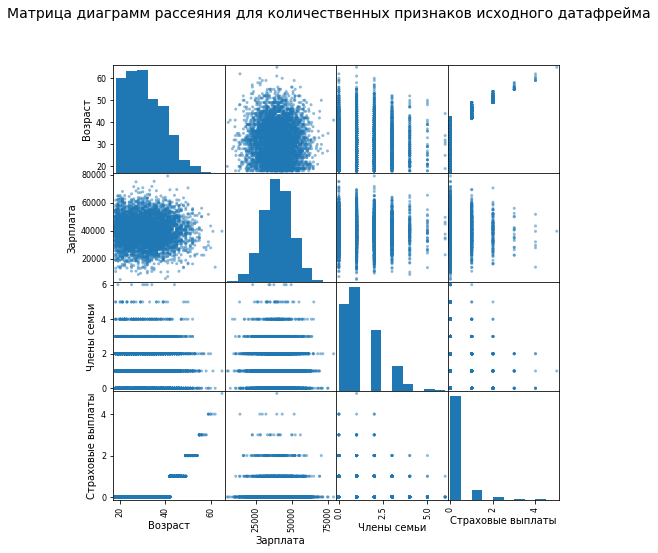

In [11]:
#строим матрицу диаграмм рассеяния для количественных признаков исходного датафрейма
pd.plotting.scatter_matrix(df_insurance[["Возраст", 
                                         "Зарплата", 
                                         "Члены семьи", 
                                         "Страховые выплаты"]],
                           figsize=(8, 8))
plt.suptitle('Матрица диаграмм рассеяния для количественных признаков исходного датафрейма', 
             fontsize=14)
plt.show()

Из диаграммы рассеяния можно сделать вывод, что **чем старше клиент, тем больше количество страховых выплат**. По остальным признакам взаимосвязи неочевидны.

С помощью тепловой карты визуализируем значение коэффициента корреляции Пирсона:

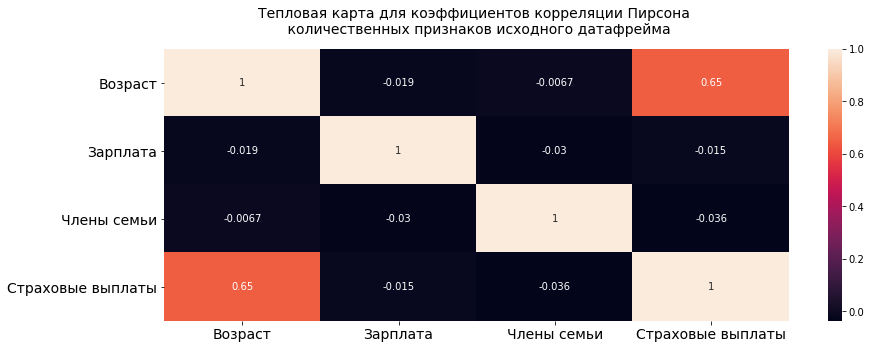

In [12]:
#строим матрицу корреляции с использованием тепловой карты
plt.figure(figsize=(14,5))

sns.heatmap(
    df_insurance[["Возраст", 
                  "Зарплата", 
                  "Члены семьи", 
                  "Страховые выплаты"]]
    .corr(),
    annot=True)

#название графика
plt.title('Тепловая карта для коэффициентов корреляции Пирсона \n количественных признаков исходного датафрейма', 
          fontsize=14, 
          loc='center',
          pad=15)

#задаём размер значений на оси абсцисс и на оси ординат
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Тепловая карта подтверждает предыдущий вывод: коэффициент корреляции Пирсона между возрастом и количеством страховых выплат **0,65**, то есть наблюдается умеренная положительная зависимость, так как значение больше 0,5, но менее 1.

С помощью **диаграмм плотности частоты** ознакомимся с распределениями количественных переменных:

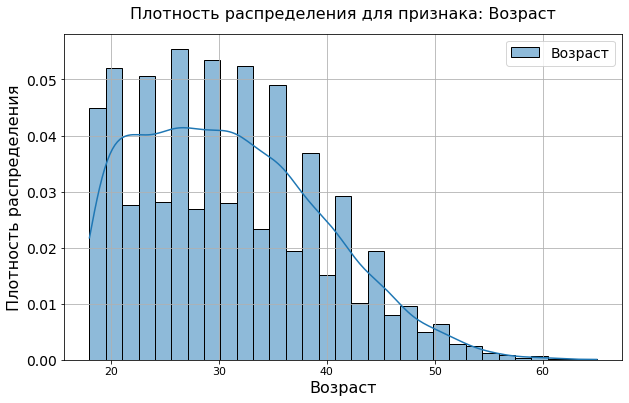

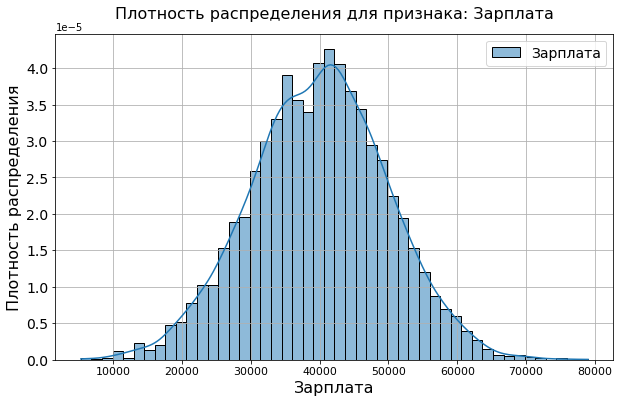

In [13]:
for name in ['Возраст','Зарплата']:
    
    plt.rcParams['figure.figsize']=(10,6)

    sns.histplot(df_insurance[name],
                 kde=True, label=name,
                 stat="density")

    #название графика
    plt.title('Плотность распределения для признака: '+name, 
              fontsize=16, pad = 15)
    
    #подписи осей
    plt.xlabel(name, fontsize=16)
    plt.ylabel('Плотность распределения', fontsize=16)
    
    #задаём размер значений на оси абсцисс и на оси ординат
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=14)
    
    plt.legend(fontsize=14)
    
    #отображение сетки
    plt.grid()
    plt.show()

Также с помощью **гистограмм** ознакомимся с распределениями дискретных перменных:

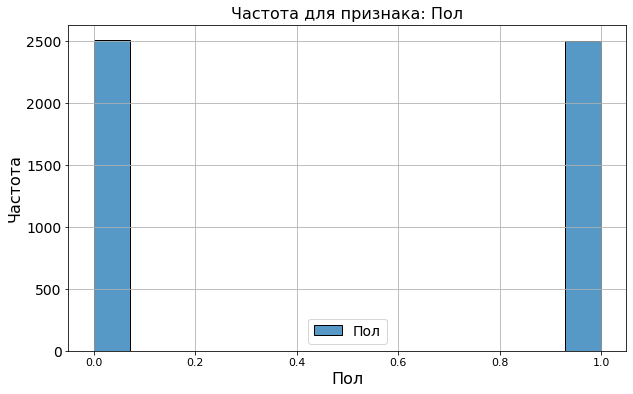

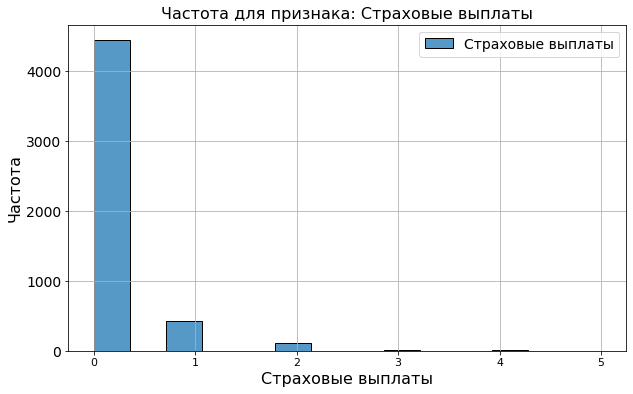

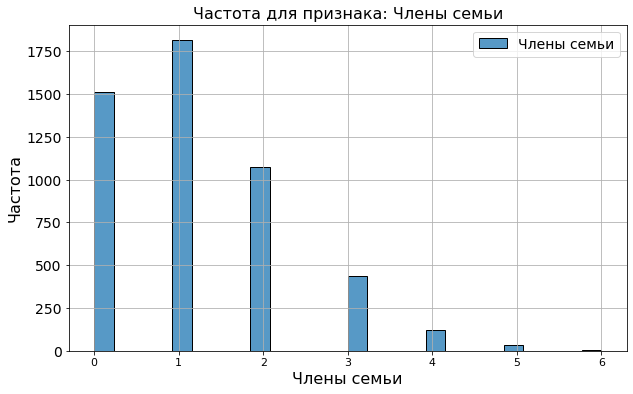

In [14]:
for name in ['Пол', 'Страховые выплаты','Члены семьи']:
    plt.rcParams['figure.figsize']=(10,6)
    
    sns.histplot(df_insurance[name],
                 label=name,
                 kde=False)

    #название графика
    plt.title('Частота для признака: '+name, fontsize=16 )
    
    #подписи осей
    plt.xlabel(name, fontsize=16)
    plt.ylabel('Частота', fontsize=16)
    
    #задаём размер значений на оси абсцисс и на оси ординат
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=14)
    
    plt.legend(fontsize=14)
    
    #отображение сетки
    plt.grid()
    plt.show()

По диаграммам можно сделать вывод, что нам предстоит работать с подготовленными данными без выбросов и аномальных значений. 

Проверим исходный датафрейм на наличие **явных полных дубликатов**:

In [15]:
#подсчет количества полных явных дубликатов
df_insurance.duplicated().sum()

153

Мы имеем **153 полных дубликата**, то есть это объекты, имеющие *один или несколько* полных аналогов по признакам `Пол`, `Возраст`, `Зарплата`, `Члены семьи` и целевому признаку `Страховые выплаты`. В реальной жизни такое **не исключено**, но для обучения модели, вероятно, эти строки были бы лишними, так как не несут новой информации.

Так как основная задача данного проекта - **безопасность личных данных** клиентов, то не будем удалять дубликаты на текущем этапе.

### Вывод

Загружены и изучены исходные данные:
- в нашем распоряженнии данные о **5000 клиентах по 5 признакам**: пол, зарплата, члены семьи, возраст, количество страховых выплат
- целевой признак - *количество страховых выплат*
- изучение данных показало наличие **153 явных полных дубликата** в исходной таблице, которые не будем удалять на текущем этапе, потому что подобная ситуация не исключена в реальной жизни, а задача проекта - защита персональных данных клиента
- Пол - бинарный качественный признак, который принимает значения 1 или 0. Выборка по полу *не смещена*, примерно одинаковое количество женщин и мужчин, так как среднее значение около 0,5.
- Возраст, Зарплата, Члены семьи - количественные признаки, средняя и медиана в них близки, что говорит о *равномерности выборок*.
- Возраст - дискретная переменная, принимающая определённые значения, тип данных изменен *на целочисленный*.
- Зарплата клиентов от 5300 до 79000 единиц, *в среднем - 39916 тыс, медиана - 40200 ед*.
- По признаку Члены семьи мы знаем, что у клиентов от 0 до 6 членов семьи. В среднем 1,2, медиана - 1.
- Возраст клиентов от 18 до 65 лет, в среднем 30,95, медиана 30.
- В ходе проверки на мульколлинеарность показано, что **чем старше клиент, тем больше количество страховых выплат**
- У большинства клиентов количество страховых выплат минимально, как показало распределение частот: в основном - 0, иногда - 1 или 2, гораздо реже от 3 и выше.
- Стоит обратить внимание на русскоязычные названия столбцов, что является отклонением от хорошего стиля. Но так как нам предстоит работать с матрицами, то заголовки признаков не так важны, поэтому оставим их без изменений.

После изучения данных предварительно можно утверждать, что информации для проведения исследования достаточно.

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Вопрос**: 

Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** *Не изменится*.

**Обоснование:** 

**Квадратные** матрицы, для которых можно найти обратные, называются **обратимыми**.

Задача обучения линейной регрессии - найти *вектор весов линейной регрессии* $w$, в котором нулевой элемент равен сдвигу $w0$.

Тогда предсказания мы найдем как:

$$
a = Xw.
$$
 
Параметры линейной регрессии **в исходной задаче**:
 
$$
w = (X^T X)^{-1} X^T y.
$$

Умножение вектора признаков $X$ на любую обратимую матрицу приведёт к изменению значений признаков. Но так как обучение происходит заново, то *вектор весов будет определен снова*. Так как на обучение будет передаваться целевой признак без изменений, то тренировка будет выполнена так, что качество модели не ухудшится. 

Теперь **продемонстрируем это математически**.

В преобразованной задаче мы умножаем вектор признаков (размерностью $m \times n$) на любую обратимую матрицу, то есть квадратную (размерностью $n \times n$):

$$
X(m\times n)P(n\times n).
$$

Тогда предсказания будут записаны как

$$
a_p = XPw_p.
$$

Посмотрим как изменится формула параметров линейной регрессии в преобразованной задаче:

$$
w_p = ((XP)^T (XP))^{-1} (XP)^T y.
$$


Известно, что транспонированное произведение матриц равно произведению транспонированных матриц, взятых в обратном порядке, тогда:

$$
w_p = ((XP)^T (XP))^{-1} (XP)^T y = (P^TX^T XP)^{-1}P^TX^T y
$$

Воспользуемся свойством обратной матрицы $(AB)^{-1}=B^{-1}A^{-1}$, которое справедливо **для двух квадратных обратимых матриц** $A$ и $B$:

$$
w_p = (P^TX^T XP)^{-1}P^TX^T y = P^{-1}(P^TX^T X)^{-1}P^TX^T y
$$

Мы имеем право так сделать, потому что размерность $P^TX^T X$ имеет размерность квадратной матрицы $(n \times  n)$, так как размерности матриц при произведении: 
$$P^T(n \times  n) X^T(n \times  m) X(m \times  n).$$ 

В соотвествии с **сочетательным свойством** умножения матриц мы можем сначала перемножить $X^T(n \times  m)$ и $X(m \times  n)$, получим в результате размерность $(n \times  n)$, которая сохранится при умножении на квадратную матрицу аналогичной размерности $P^T$.

Как уже было показано выше, умножение $X^T(n \times  m)$ и $X(m \times  n)$ даёт в результате квадратную матрицу $(n \times  n)$, что позволяет нам ещё раз применить свойство обратных матриц:

$$
w_p  = P^{-1}(P^T X^T X)^{-1}P^TX^T y = P^{-1} (X^T X)^{-1} P^{-T}P^TX^T y
$$

Воспользуемся свойством единичных матриц: при умножении матрицы на обратную ей **получается единичная матрица**. Тогда $P^{-T}P^T=E$, выражение для $w_p$ изменится следующим образом:

$$
w_p  = P^{-1} (X^T X)^{-1} X^T y
$$

Для наглядности запишем повторно вектор параметров линейной регрессии для исходной задачи:

$$
w = (X^T X)^{-1} X^T y.
$$

Очевидно, что для преобразованной задачи можем записать:

$$
w_p  = P^{-1} w
$$

Тогда *предсказания* в задаче *после преобразования* **равны** *предсказаниям исходной задачи*:

$$
a_p = XPw_p = XPP^{-1} w = Xw = a
$$

Что и требовалось доказать.

### Вывод

Умножение признаков на любую обратимую матрицу **не влияет на качество** моделей линейной регрессии. 

Это позволяет, по сути, "зашифровать" личные данные пользователей и не ухудшить качество модели машинного обучения. В этом случае расшифрока данных пользователей возможна только тогда, когда доступен "ключ" - искомая обратимая матрица, с помощью которой выполнено преобразование признаков.

## Алгоритм преобразования

В предыдущем параграфе подробно описан подход к задаче шифрования данных клиентов с использованием обратимой матрицы. Здесь выделим основные моменты, которые проверим на следующем шаге.

**Алгоритм преобразования данных для решения задачи**

- Выделяем признаки $X$ и целевой признак $y$ из исходного набора данных `df_insurance`
- В данной задаче в признаках получится матрица $X$ размерностью $(m \times n)$, где $m=5000$, $n=4$
- с помощью `np.random.normal()` генерируем случайную квадратную матрицу $P$ размерностью $(n \times n)$, важно чтобы размерность была такой, иначе не получится выполнить матричное умножение. Как известно,  вероятность получить необратимую матрицу с использованием `np.random.normal()` близка к нулю
- Умножаем матрицу $X$ на $P$, получаем преобразованные данные, с которыми можно работать дальше: 
    - разделять на тестовый и обучающие наборы данных, 
    - обучать модель, 
    - исследовать поведение метрики $R2$.

**Обоснование**

Подробное пошаговое математическое обоснование сохранения качества модели линейной регрессии при преобразовании данных приведено выше. 

Здесь дополнительно обратим внимание, что операции с целевым признаком $y$ **не производятся**, он сохраняется таким, как в исходной задаче. 

Это позволяет при обучении модели на преобразованных данных при обнаружении вектора параметров модели линейной регрессии $w_p$ подстроится под изменённые признаки так, что в результате получается произведение обратной матрицы $P^{-1}$ на вектор параметров модели линейной регрессии исходной задачи $w$. Это позволяет получить предсказания такие же, как в исходной задаче, как было показано выше.

### Вывод

Предложен алгоритм для работы с личными данными клиентов, позволяющий не ухудшать качество моделей машинного обучения.

## Проверка алгоритма

### Выделение признаков и целевого признака

Для начала выделим из исходного набора данных признаки и целевой признак.

Признаки - все, кроме страховых выплат:

In [16]:
#сохраняем признаки исходного набора данных в переменной X
X = df_insurance.drop(['Страховые выплаты'], axis=1)

Целевой признак сохраним в переменной `y`:

In [17]:
#сохраняем целевой признак исходного набора данных в переменной y
y = df_insurance['Страховые выплаты']

### Случайная обратимая матрица

Сгенерируем случайную обратимую матрицу размерностью $(4 \times 4)$:

In [18]:
#случайным образом сгенерируем матрицу размерностью 4х4
P = np.random.normal(size=(4, 4))

#выведем её на экран
print('Случайная обратимая матрица:')
display(P)

Случайная обратимая матрица:


array([[ 0.98157472, -1.88255379,  0.43171847, -0.28945808],
       [ 1.89064732,  0.93330585, -1.42662243,  1.01097538],
       [ 1.56814686, -0.10867489,  0.44870791,  1.75756161],
       [-1.24814213,  1.17128268,  1.92284577, -0.47055289]])

Проверим является ли матрица обратимой, найдём для неё обратную:

In [19]:
#найдём обратную матрицу для сгенерированной на предыдщем шаге
np.linalg.inv(P) 

array([[ 0.558937  ,  0.62972872, -0.16817917,  0.3809692 ],
       [-0.08814343,  0.41676522, -0.15639148,  0.36549674],
       [ 0.27589352,  0.02231119,  0.15029811,  0.43959915],
       [-0.57458577, -0.54178835,  0.67098294, -0.42954224]])

Обратная матрица успешно найдена, можно продолжить проверку алгоритма.

### Преобразование признаков

Преобразуем признаки умношением матрицы $X$ на матрицу $P$:

In [20]:
#выполняем преобразование личных данных клиентов
X_p = X.values @ P

Посмотрим как изменились личные данные и можно ли будет что-то по ним восстановить:

In [21]:
#с помощью DataFrame смотрим как изменились личные данные после преобразования
pd.DataFrame(X_p,columns=X.columns).head()

,Пол,Возраст,Зарплата,Члены семьи
0,77857.334426,-5352.720207,22199.775277,87215.745651
1,59675.302466,-4085.542416,16987.198715,66833.375353
2,32985.912916,-2255.106792,9381.494016,36938.112018
3,65428.931538,-4509.800868,18685.006381,73310.608359
4,40982.552850,-2812.164583,11671.762687,45900.375776


Теперь проверим преобразование, умножим на обратную матрицу:

In [22]:
#умножаем преобразованные данные на обратную матрицу и смотрим результат
pd.DataFrame(X_p @ np.linalg.inv(P),
             columns=X.columns).head()

,Пол,Возраст,Зарплата,Члены семьи
0,1.000000e+00,41.0,49600.0,1.000000e+00
1,-4.980299e-12,46.0,38000.0,1.000000e+00
2,-2.887095e-12,29.0,21000.0,3.766948e-12
3,-9.615533e-12,21.0,41700.0,2.000000e+00
4,1.000000e+00,28.0,26100.0,2.417084e-12


Для наглядности выведем несколько строк $X$ до преобразования:

In [23]:
X.head()

,Пол,Возраст,Зарплата,Члены семьи
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


Очевидно, что результат совпадает, в датафрейме после преобразования есть значения $10^{-12}$, но это связано с особенностью вычислений вещественных чисел, что корректируется изменением формата данных.

Продолжим работу с преобразованными данными.

### Разделение на обучающий и тестовый наборы данных

Разобьем исходный набор данных на обучающую и тестовую выборки в соотношении (4:1).

Отложим тестовую выборку (20%), в обучающей оставим 80% исходного датасета.

Используем `train_test_split` из модуля `sklearn.model_selection`. Разбивку произведём псевдослучайным образом, задав параметр `random_state` равным `12345`.

Так как придется проверять на алгоритм на преобразованных и исходных данных, то введём функцию для разделения на обучающий и тестовый наборы данных:

In [24]:
#разделяем исходную выборку на тестовую и обучающую, сохраняем отдельно признаки и целевой признак

def train_test(X,y,size):
    (X_train, 
     X_test, 
     y_train, 
     y_test) = train_test_split(X, 
                                y, 
                                test_size=size, 
                                random_state=12345)
    return (X_train, 
            X_test, 
            y_train, 
            y_test)

С помощью функции разделим преобразованный набор данных $X_p$:

In [25]:
#разделяем набор данных после преобразования на обучающий и тестовый наборы данных
(X_p_train, 
 X_p_test, 
 y_p_train, 
 y_p_test) = train_test(X_p,y,0.2)

Проверим корректность разделения путем контроля размерностей с помощью цикла:

In [26]:
#контролируем размерность каждого получившегося набора данных
for name in ['X_p_train','X_p_test','y_p_train','y_p_test']:
    print('Размерность для '+name)
    print(locals()[name].shape)
    print()

Размерность для X_p_train
(4000, 4)

Размерность для X_p_test
(1000, 4)

Размерность для y_p_train
(4000,)

Размерность для y_p_test
(1000,)



Очевидно, что разделение на обучающий и тестовый наборы данных **выполнено корректно**.

Аналогично разделим исходный набор данных:

In [27]:
#разделяем набор данных ДО преобразования на обучающий и тестовый наборы данных
(X_train, 
 X_test, 
 y_train, 
 y_test) = train_test(X,y,0.2)

### Обучение модели линейной регрессии

Создим класс `LinearRegression`:
- метод `fit()` примет на вход признаки и целевой признак, вычислит `w` по формуле минимизации *MSE*, создаст атрибуты `w` и `w0`
- метод `predict()` примет признаки, а вернёт предсказания модели линейной регрессии на всех объектах.

In [28]:
#создаём класс LinearRegression
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(((X.T@X)))@X.T@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

Для аккуратной проверки качества двух моделей создаим отдельно каждую, с которыми будем параллельно выполнять опреации обучения, предсказания и оценки качества.

Модель линейной регрессии для исходного набора данных:

In [29]:
# модель линейной регрессии для исходного набора данных
model = LinearRegression()

Модель линейной регрессии для преобразованного набора данных:

In [30]:
# модель линейной регрессии для преобразованного набора данных
model_p = LinearRegression()

Выполним обучение модели для исходного набора данных:

In [31]:
# обучение модели линейной регрессии для исходного набора данных
model.fit(X_train, y_train)

Обучим модель для преобразованного набора данных

In [32]:
# обучение модели линейной регрессии для преобразованного набора данных
model_p.fit(X_p_train, y_p_train)

Найдём предсказания на тестовой выборке:

- для исходного набора данных

In [33]:
# предсказания на тестовой выборке для модели линейной регрессии исходного набора данных
predictions = model.predict(X_test)

- для преобразованного набора данных

In [34]:
# предсказания на тестовой выборке для модели линейной регрессии преобразованного набора данных
predictions_p = model_p.predict(X_p_test)

**Значения метрик** $R2$ с использованием `r2_score` для исходного набора данных:

In [35]:
#значение метрики R2 для исхнодого набора данных
r2 = r2_score(y_test, predictions)

и для преобразованного:

In [36]:
#значение метрики R2 для преобразованного набора данных
r2_p = r2_score(y_p_test, predictions_p)

Напечатаем на экране значения метрик $R2$ для исходного набора данных и преобразованного:

In [37]:
print('Качество линейной регрессии на исходном наборе данных: ', r2)
print()
print('Качество линейной регрессии на преобразованном наборе данных: ', r2_p)

Качество линейной регрессии на исходном наборе данных:  0.41176839567704737

Качество линейной регрессии на преобразованном наборе данных:  0.4117683952881619


*Разница в качестве моделей* **ничтожно мала**, обусловлена особенностью вычислений для вещественных чисел.

Разница в относительных единицах:

In [38]:
abs(r2-r2_p)/r2*100

9.44427701244291e-08

на уровне $10^{-5} \dots 10^{-8}$ процента. Может меняться при перезапуске, так как матрица $P$ генерируется случайным образом.

### Вывод

Качество модели линейной регресии не изменилось в результате использованного подхода к преобразованию личных данных клиентов.

## Общий вывод

1. Данные загружены и изучены: в нашем распоряженнии данные о 5000 клиентах по 5 признакам: пол, зарплата, члены семьи, возраст, количество страховых выплат.

2. Приведено строгое матиматическое обоснование того факта, что **умножение признаков на любую обратимую матрицу не влияет на качество моделей линейной регрессии**. Это позволяет, по сути, "зашифровать" личные данные пользователей и не ухудшить качество модели машинного обучения. В этом случае расшифрока данных пользователей возможна только тогда, когда доступен "ключ" - искомая обратимая матрица, с помощью которой выполнено преобразование признаков.

3. Предложен алгоритм для работы с личными данными клиентов, позволяющий не ухудшать качество моделей машинного обучения.

4. Выполнена проверка предложенного алгоритма, в ходе которой показано, что качество модели линейной регресии не изменилось в результате использованного подхода к преобразованию личных данных клиентов. Разница между работой с исходным набором данных и с перобразованным в относительных единицах для метрики $R2$ получена на уровне $10^{-5}  \dots 10^{-8}$. Это значение ничтожно мало, связано с особенностью вычислений для вещественных чисел. Соответственно, сохранение качества подтверждено.